In [1]:
# Ici j'importe mes librairies afin de traiter toutes mes données 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import scipy as sc
import seaborn as sns
from sklearn import decomposition 
from sklearn import preprocessing 
from scipy.cluster.hierarchy import dendrogram, linkage

## Nettoyage des fichiers

<span style='color:blue'> FICHIER DISPO ALIMENTAIRE </span>

In [2]:
dispo_alim=pd.read_csv('DisponibiliteAlimentaire_2017.csv')
dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [3]:
dispo_alim.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


Dans le tableau ci-dessous on remarque que plusieurs colonnes ne sont pas indispensables:
- Les colonnes 'Code domaine'et 'domaine' ont une valeur unique
- Les colonnes 'Code Élément' , 'Code Produit' , 'Code année' , 'Code zone' et 'Symbole' sont des valeurs doubles. Je vais donc supprimer ces colonnes afin de garder les informations pertinentes et aérer ce tableau

In [4]:
dispo_alim.drop(dispo_alim.columns[[0,1,2,4,6,8,12]], axis=1, inplace=True)
dispo_alim

,Zone,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.00,Données standardisées
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.00,Données standardisées
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.00,Données standardisées
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.00,Données standardisées
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.00,Données standardisées
...,...,...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,2017,Milliers de tonnes,19.00,Données standardisées
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,2017,kg,1.33,Donnée calculée
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2017,Kcal/personne/jour,1.00,Donnée calculée
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2017,g/personne/jour,0.04,Donnée calculée


In [5]:
#Modification des noms des colonnes
dispo_alim.rename(columns = {'Zone' : 'Zone' , 'Élément':'Element', 'Produit': 'Produit', 'Année':'Annee','Unité':'Unite', 'Valeur':'Valeur_dispo','Description du Symbole':'Description du Symbole' }, inplace=True)

#Suppression de la colonne "Description du symbole"
dispo_alim.drop(columns=['Description du Symbole'], inplace = True)
dispo_alim

,Zone,Element,Produit,Annee,Unite,Valeur_dispo
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.00
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.00
...,...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,2017,Milliers de tonnes,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,2017,kg,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2017,Kcal/personne/jour,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2017,g/personne/jour,0.04


In [6]:
dispo_alim.describe(include='all')

,Zone,Element,Produit,Annee,Unite,Valeur_dispo
count,176600,176600,176600,176600.0,176600,176600.000000
unique,174,17,98,NaN,4,NaN
top,Tchad,Disponibilité intérieure,Maïs et produits,NaN,Milliers de tonnes,NaN
freq,1416,15905,2593,NaN,118487,NaN
mean,NaN,NaN,NaN,2017.0,NaN,210.554918
std,NaN,NaN,NaN,0.0,NaN,4762.047787
min,NaN,NaN,NaN,2017.0,NaN,-10388.000000
25%,NaN,NaN,NaN,2017.0,NaN,0.000000
50%,NaN,NaN,NaN,2017.0,NaN,0.120000
75%,NaN,NaN,NaN,2017.0,NaN,8.462500


In [7]:
dispo_alim2=pd.pivot_table(dispo_alim,index=['Zone','Produit'],
                   values='Valeur_dispo',
                   columns=['Element']
                   ).reset_index()
dispo_alim2

Element,Zone,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,NaN,NaN,NaN,5.0,1.47,0.19,0.64,53.0,NaN,6.0,53.0,NaN,48.0,0.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",NaN,NaN,NaN,1.0,1.32,0.01,0.02,50.0,0.0,33.0,48.0,2.0,17.0,0.0,NaN,NaN,NaN
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0
3,Afghanistan,Aliments pour enfants,NaN,NaN,NaN,1.0,0.10,0.01,0.04,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Ananas et produits,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16042,Îles Salomon,Viande de Suides,0.0,NaN,NaN,44.0,4.49,4.24,1.38,3.0,NaN,0.0,3.0,NaN,2.0,0.0,NaN,NaN,0.0
16043,Îles Salomon,Viande de Volailles,0.0,NaN,NaN,18.0,4.45,1.31,1.51,3.0,0.0,6.0,3.0,NaN,0.0,0.0,NaN,NaN,3.0
16044,Îles Salomon,"Viande, Autre",0.0,NaN,NaN,0.0,0.01,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
16045,Îles Salomon,Vin,0.0,NaN,NaN,0.0,0.25,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0


In [8]:
dispo_alim2.isnull().sum()

Element
Zone                                                                 0
Produit                                                              0
Alimentation pour touristes                                      10487
Aliments pour animaux                                            11859
Autres utilisations (non alimentaire)                            10755
Disponibilité alimentaire (Kcal/personne/jour)                    1571
Disponibilité alimentaire en quantité (kg/personne/an)            1429
Disponibilité de matière grasse en quantité (g/personne/jour)     1535
Disponibilité de protéines en quantité (g/personne/jour)          1540
Disponibilité intérieure                                           142
Exportations - Quantité                                           3934
Importations - Quantité                                            787
Nourriture                                                        1549
Pertes                                                           1023

In [9]:
dispo_alim2['Produit'].value_counts().index.tolist()

['Poissons Eau Douce',
 'Crustacés',
 'Poissons Pelagiques',
 'Perciform',
 'Mollusques, Autres',
 'Raisin',
 'Épices, Autres',
 'Pommes de Terre et produits',
 'Sucre Eq Brut',
 'Huil Plantes Oleif Autr',
 'Bière',
 'Noix et produits',
 'Arachides Decortiquees',
 'Ananas et produits',
 "Viande d'Ovins/Caprins",
 'Boissons Alcooliques',
 'Vin',
 'Café et produits',
 'Edulcorants Autres',
 'Haricots',
 'Pamplemousse et produits',
 'Viande, Autre',
 'Poissons Marins, Autres',
 'Thé',
 'Poivre',
 'Riz et produits',
 'Viande de Bovins',
 'Légumes, Autres',
 'Huile de Soja',
 'Coco (Incl Coprah)',
 'Maïs et produits',
 'Légumineuses Autres et produits',
 'Orge et produits',
 'Miscellanees',
 'Fruits, Autres',
 'Boissons Fermentés',
 'Beurre, Ghee',
 'Feve de Cacao et produits',
 "Huile d'Olive",
 'Tomates et produits',
 'Soja',
 'Blé et produits',
 'Oranges, Mandarines',
 'Lait - Excl Beurre',
 'Viande de Volailles',
 'Aliments pour enfants',
 'Graines Colza/Moutarde',
 'Abats Comestible',


In [10]:
#dap['Viandes_total']=dispo_alim2['Viande de Bovins','Viande de Volailles', "Viande d'Ovins/Caprins",'Viande de Suides','Viande de Anim Aquatiq','Viande, Autre','Abats Comestible'].sum['N']

In [11]:
dav = dispo_alim2[dispo_alim2['Produit'].str.contains('Viande')]
dav

Element,Zone,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
75,Afghanistan,Viande d'Ovins/Caprins,NaN,NaN,NaN,26.0,4.15,2.16,1.62,160.0,NaN,0.0,151.0,9.0,160.0,NaN,NaN,NaN,NaN
76,Afghanistan,Viande de Bovins,NaN,NaN,NaN,15.0,2.61,1.20,1.09,100.0,NaN,6.0,95.0,5.0,94.0,0.0,NaN,NaN,0.0
77,Afghanistan,Viande de Suides,NaN,NaN,NaN,0.0,0.00,0.01,0.00,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
78,Afghanistan,Viande de Volailles,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
79,Afghanistan,"Viande, Autre",NaN,NaN,NaN,1.0,0.30,0.05,0.14,12.0,NaN,0.0,11.0,1.0,12.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,Îles Salomon,Viande d'Ovins/Caprins,0.0,NaN,NaN,1.0,0.08,0.05,0.03,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
16041,Îles Salomon,Viande de Bovins,0.0,NaN,NaN,15.0,2.71,1.06,1.31,2.0,NaN,1.0,2.0,NaN,1.0,0.0,NaN,NaN,0.0
16042,Îles Salomon,Viande de Suides,0.0,NaN,NaN,44.0,4.49,4.24,1.38,3.0,NaN,0.0,3.0,NaN,2.0,0.0,NaN,NaN,0.0
16043,Îles Salomon,Viande de Volailles,0.0,NaN,NaN,18.0,4.45,1.31,1.51,3.0,0.0,6.0,3.0,NaN,0.0,0.0,NaN,NaN,3.0


In [12]:
dav2=dav.groupby('Zone')['Zone','Nourriture'].sum()
dav2

<ipython-input-12-664094d9ee20>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dav2=dav.groupby('Zone')['Zone','Nourriture'].sum()


Element,Nourriture
Zone,
Afghanistan,312.0
Afrique du Sud,3422.0
Albanie,136.0
Algérie,748.0
Allemagne,7255.0
...,...
Émirats arabes unis,588.0
Équateur,759.0
États-Unis d'Amérique,40344.0


In [13]:
dav2.rename(columns = {'Nourriture':'Viande_tot'}, inplace=True)
dav2

Element,Viande_tot
Zone,
Afghanistan,312.0
Afrique du Sud,3422.0
Albanie,136.0
Algérie,748.0
Allemagne,7255.0
...,...
Émirats arabes unis,588.0
Équateur,759.0
États-Unis d'Amérique,40344.0


In [14]:
dap = dispo_alim2[dispo_alim2['Produit'] == 'Viande de Volailles']
dap

Element,Zone,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
78,Afghanistan,Viande de Volailles,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
173,Afrique du Sud,Viande de Volailles,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
265,Albanie,Viande de Volailles,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
357,Algérie,Viande de Volailles,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
452,Allemagne,Viande de Volailles,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Émirats arabes unis,Viande de Volailles,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
15765,Équateur,Viande de Volailles,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
15860,États-Unis d'Amérique,Viande de Volailles,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
15954,Éthiopie,Viande de Volailles,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


In [15]:
dap2= dap[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Production','Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité','Nourriture']]
dap2

Element,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture
78,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0
173,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0
265,Albanie,85.0,13.0,47.0,0.0,38.0,47.0
357,Algérie,22.0,275.0,277.0,0.0,2.0,264.0
452,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0
...,...,...,...,...,...,...,...
15668,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0
15765,Équateur,83.0,340.0,341.0,0.0,0.0,324.0
15860,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0
15954,Éthiopie,0.0,14.0,14.0,NaN,1.0,14.0


In [16]:
dap2.rename(columns = {'Nourriture':'Conso_Volaille'}, inplace=True)
dap2

/Users/user/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Element,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Conso_Volaille
78,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0
173,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0
265,Albanie,85.0,13.0,47.0,0.0,38.0,47.0
357,Algérie,22.0,275.0,277.0,0.0,2.0,264.0
452,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0
...,...,...,...,...,...,...,...
15668,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0
15765,Équateur,83.0,340.0,341.0,0.0,0.0,324.0
15860,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0
15954,Éthiopie,0.0,14.0,14.0,NaN,1.0,14.0


In [17]:
dap2_dav2=pd.merge(dap2, dav2, on=['Zone'], how='left', indicator=True)
dap2_dav2

Element,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Conso_Volaille,Viande_tot,_merge
0,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0,312.0,both
1,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0,both
2,Albanie,85.0,13.0,47.0,0.0,38.0,47.0,136.0,both
3,Algérie,22.0,275.0,277.0,0.0,2.0,264.0,748.0,both
4,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0,both
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0,588.0,both
168,Équateur,83.0,340.0,341.0,0.0,0.0,324.0,759.0,both
169,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0,40344.0,both
170,Éthiopie,0.0,14.0,14.0,NaN,1.0,14.0,576.0,both


In [18]:
dap2_dav2['_merge'].unique()

['both']
Categories (1, object): ['both']

In [19]:
dap2_dav2.drop(columns =['_merge'], inplace=True)

In [20]:
dap2_dav2

Element,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Conso_Volaille,Viande_tot
0,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0,312.0
1,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0
2,Albanie,85.0,13.0,47.0,0.0,38.0,47.0,136.0
3,Algérie,22.0,275.0,277.0,0.0,2.0,264.0,748.0
4,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0,588.0
168,Équateur,83.0,340.0,341.0,0.0,0.0,324.0,759.0
169,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0,40344.0
170,Éthiopie,0.0,14.0,14.0,NaN,1.0,14.0,576.0


In [21]:
dap.isna().sum()

Element
Zone                                                               0
Produit                                                            0
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                

<span style='color:blue'> FICHIER  POPULATION DE 2000 A 2018 </span>

In [22]:
pop=pd.read_csv('Population_2000_2018.csv')
pop

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [23]:
pop.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Saint-Kitts-et-Nevis,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


Dans le tableau ci-dessous on remarque que plusieurs colonnes ne sont pas indispensables:
- Les colonnes 'Code domaine', 'domaine', 'Elément', 'Produit', 'Unité' et 'Note' ont une valeur unique
- Les colonnes 'Code Élément' , 'Code Produit' , 'Code année' , 'Code zone' et 'Symbole' sont des valeurs doubles. Je vais donc supprimer ces colonnes afin de garder les informations pertinentes et aérer ce tableau

In [24]:
pop.drop(columns =['Code Domaine', 'Domaine', 'Élément', 'Produit', 'Unité', 'Note','Code Élément' ,'Code Produit', 'Code année','Symbole','Description du Symbole'], inplace=True, axis=1)
pop

,Code zone,Zone,Année,Valeur
0,2,Afghanistan,2000,20779.953
1,2,Afghanistan,2001,21606.988
2,2,Afghanistan,2002,22600.770
3,2,Afghanistan,2003,23680.871
4,2,Afghanistan,2004,24726.684
...,...,...,...,...
4406,181,Zimbabwe,2014,13586.707
4407,181,Zimbabwe,2015,13814.629
4408,181,Zimbabwe,2016,14030.331
4409,181,Zimbabwe,2017,14236.595


In [25]:
pop.rename(columns = {'Année':'Annee', 'Valeur':'Valeur_pop'}, inplace=True)
pop.head()

,Code zone,Zone,Annee,Valeur_pop
0,2,Afghanistan,2000,20779.953
1,2,Afghanistan,2001,21606.988
2,2,Afghanistan,2002,22600.770
3,2,Afghanistan,2003,23680.871
4,2,Afghanistan,2004,24726.684


In [26]:
pop.isnull().sum()

Code zone     0
Zone          0
Annee         0
Valeur_pop    0
dtype: int64

In [27]:
pop['Annee']=pop['Annee'].astype(str)

In [28]:
pop.describe(include='all')

,Code zone,Zone,Annee,Valeur_pop
count,4411.000000,4411,4411,4.411000e+03
unique,NaN,238,19,NaN
top,NaN,Saint-Kitts-et-Nevis,2018,NaN
freq,NaN,19,236,NaN
mean,132.202902,NaN,NaN,2.963004e+04
std,75.854840,NaN,NaN,1.238029e+05
min,1.000000,NaN,NaN,7.850000e-01
25%,68.000000,NaN,NaN,3.921890e+02
50%,132.000000,NaN,NaN,4.764741e+03
75%,195.000000,NaN,NaN,1.821548e+04


In [29]:
pop16_17=pd.pivot_table(pop,index=['Zone'],
                   values='Valeur_pop',
                   columns=['Annee'],  
                   aggfunc=sum
                   ).reset_index()
pop16_17

Annee,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
1,Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518
2,Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740
3,Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408
4,Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,412.660,423.944,435.432,447.017,458.539,469.918,481.078,492.132,503.360,515.181,527.861,541.521,556.063,571.336,587.079,603.118,619.438,636.039,652.857
234,Îles Turques-et-Caïques,20.164,21.573,23.232,25.011,26.700,28.180,29.391,30.385,31.202,31.934,32.660,33.377,34.066,34.731,35.369,35.981,36.559,37.115,37.665
235,Îles Vierges américaines,108.722,108.691,108.561,108.360,108.092,107.794,107.462,107.115,106.756,106.412,106.087,105.793,105.534,105.303,105.114,104.958,104.835,104.751,104.680
236,Îles Vierges britanniques,20.311,20.675,21.129,21.672,22.334,23.107,24.023,25.047,26.097,27.039,27.794,28.319,28.650,28.847,28.989,29.152,29.355,29.577,29.802


In [30]:
pop16_17=pop16_17[['Zone', '2016', '2017']]

In [31]:
pop16_17['2016'] *=1000 
pop16_17['2017'] *=1000 

<ipython-input-31-8a76780034f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop16_17['2016'] *=1000
<ipython-input-31-8a76780034f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop16_17['2017'] *=1000


In [32]:
pop16_17

Annee,Zone,2016,2017
0,Afghanistan,35383032.0,36296113.0
1,Afrique du Sud,56207646.0,57009756.0
2,Albanie,2886438.0,2884169.0
3,Algérie,40551392.0,41389189.0
4,Allemagne,82193768.0,82658409.0
...,...,...,...
233,Îles Salomon,619438.0,636039.0
234,Îles Turques-et-Caïques,36559.0,37115.0
235,Îles Vierges américaines,104835.0,104751.0
236,Îles Vierges britanniques,29355.0,29577.0


In [33]:
#Calcul de la variation de la population
pop16_17_2= pop16_17.copy()
pop16_17_2['Variation_Population']=round(((pop16_17['2017']- pop16_17['2016'])/pop16_17['2017'])*100,2)
pop16_17_2

Annee,Zone,2016,2017,Variation_Population
0,Afghanistan,35383032.0,36296113.0,2.52
1,Afrique du Sud,56207646.0,57009756.0,1.41
2,Albanie,2886438.0,2884169.0,-0.08
3,Algérie,40551392.0,41389189.0,2.02
4,Allemagne,82193768.0,82658409.0,0.56
...,...,...,...,...
233,Îles Salomon,619438.0,636039.0,2.61
234,Îles Turques-et-Caïques,36559.0,37115.0,1.50
235,Îles Vierges américaines,104835.0,104751.0,-0.08
236,Îles Vierges britanniques,29355.0,29577.0,0.75


## Jointure des fichiers

In [34]:
tab=pd.merge(dap2_dav2, pop16_17_2, on=['Zone'], how='left', indicator=True)
tab

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Conso_Volaille,Viande_tot,2016,2017,Variation_Population,_merge
0,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0,312.0,35383032.0,36296113.0,2.52,both
1,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0,56207646.0,57009756.0,1.41,both
2,Albanie,85.0,13.0,47.0,0.0,38.0,47.0,136.0,2886438.0,2884169.0,-0.08,both
3,Algérie,22.0,275.0,277.0,0.0,2.0,264.0,748.0,40551392.0,41389189.0,2.02,both
4,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0,82193768.0,82658409.0,0.56,both
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0,588.0,9360980.0,9487203.0,1.33,both
168,Équateur,83.0,340.0,341.0,0.0,0.0,324.0,759.0,16491116.0,16785361.0,1.75,both
169,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0,40344.0,323015995.0,325084756.0,0.64,both
170,Éthiopie,0.0,14.0,14.0,NaN,1.0,14.0,576.0,103603462.0,106399924.0,2.63,both


In [35]:
tab['_merge'].unique()

['both']
Categories (1, object): ['both']

In [36]:
tab.describe(include='all')

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Conso_Volaille,Viande_tot,2016,2017,Variation_Population,_merge
count,172,172.000000,168.000000,170.000000,135.000000,170.000000,170.000000,172.000000,1.720000e+02,1.720000e+02,172.000000,172
unique,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Tchad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172
mean,NaN,74.558140,725.190476,687.594118,132.185185,89.529412,657.047059,1816.110465,4.237561e+07,4.284175e+07,1.241802,NaN
std,NaN,60.571277,2501.457125,2187.184747,513.784440,186.669983,2136.545796,7409.280093,1.518645e+08,1.530637e+08,1.102611,NaN
min,NaN,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,5.162500e+04,5.204500e+04,-1.550000,NaN
25%,NaN,22.000000,13.750000,30.500000,0.000000,3.000000,28.500000,95.750000,2.888777e+06,2.874480e+06,0.457500,NaN
50%,NaN,64.000000,70.000000,100.000000,3.000000,16.000000,99.500000,319.500000,9.645164e+06,9.757833e+06,1.175000,NaN
75%,NaN,105.500000,409.750000,368.250000,32.000000,81.250000,365.250000,818.750000,3.005960e+07,3.013874e+07,2.052500,NaN


In [37]:
tab.drop(columns =['_merge'], inplace=True)

In [38]:
tab.rename(columns = {'2017':'Population 2017', '2016':'Population 2016', 'Exportations - Quantité':'Exportations','Importations - Quantité':'Importations'}, inplace=True)
tab.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population
0,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0,312.0,35383032.0,36296113.0,2.52
1,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0,56207646.0,57009756.0,1.41
2,Albanie,85.0,13.0,47.0,0.0,38.0,47.0,136.0,2886438.0,2884169.0,-0.08
3,Algérie,22.0,275.0,277.0,0.0,2.0,264.0,748.0,40551392.0,41389189.0,2.02
4,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0,82193768.0,82658409.0,0.56


FICHIER PIB

In [39]:
pib=pd.read_csv('pib.csv')
pib

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.4,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.3,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.0,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,11737.4,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,53071.5,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,NaN,X,Sources internationales sûres,NaN
200,FS,Données de la sécurité alimentaire,237,Viet Nam,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,8996.4,X,Sources internationales sûres,NaN
201,FS,Données de la sécurité alimentaire,249,Yémen,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,NaN,X,Sources internationales sûres,NaN
202,FS,Données de la sécurité alimentaire,251,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3485.0,X,Sources internationales sûres,NaN


In [40]:
pib.drop(columns =['Code Domaine','Unité','Code Élément','Domaine','Élément','Code Produit','Produit','Code année','Symbole','Description du Symbole', 'Note' ], inplace=True)

In [41]:
pib.rename(columns = {'Année':'Annee', 'Code zone (FAO)':'Code zone', 'Valeur':'PIB'}, inplace=True)
pib

,Code zone,Zone,Annee,PIB
0,2,Afghanistan,2017,2058.4
1,202,Afrique du Sud,2017,13860.3
2,3,Albanie,2017,12771.0
3,4,Algérie,2017,11737.4
4,79,Allemagne,2017,53071.5
...,...,...,...,...
199,236,Venezuela (République bolivarienne du),2017,NaN
200,237,Viet Nam,2017,8996.4
201,249,Yémen,2017,NaN
202,251,Zambie,2017,3485.0


In [42]:
tab1 = pd.merge(tab, pib, on=['Zone'], how='left', indicator=True)
tab1

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Production,Disponibilité intérieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population,Code zone,Annee,PIB,_merge
0,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0,312.0,35383032.0,36296113.0,2.52,2,2017,2058.4,both
1,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0,56207646.0,57009756.0,1.41,202,2017,13860.3,both
2,Albanie,85.0,13.0,47.0,0.0,38.0,47.0,136.0,2886438.0,2884169.0,-0.08,3,2017,12771.0,both
3,Algérie,22.0,275.0,277.0,0.0,2.0,264.0,748.0,40551392.0,41389189.0,2.02,4,2017,11737.4,both
4,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0,82193768.0,82658409.0,0.56,79,2017,53071.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0,588.0,9360980.0,9487203.0,1.33,225,2017,67183.6,both
168,Équateur,83.0,340.0,341.0,0.0,0.0,324.0,759.0,16491116.0,16785361.0,1.75,58,2017,11617.9,both
169,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0,40344.0,323015995.0,325084756.0,0.64,231,2017,59914.8,both
170,Éthiopie,0.0,14.0,14.0,NaN,1.0,14.0,576.0,103603462.0,106399924.0,2.63,238,2017,2021.6,both


In [43]:
tab1['_merge'].unique()
tab1.drop(columns =['_merge','Annee','Code zone'], inplace=True)

In [44]:
tab1.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)':'Disponibilite alimentaire (Kcal/personne/jour)', 'Disponibilité intérieure':'Disponibilite interieure'}, inplace=True)

In [45]:
tab1.isna().sum()

Zone                                               0
Disponibilite alimentaire (Kcal/personne/jour)     0
Production                                         4
Disponibilite interieure                           2
Exportations                                      37
Importations                                       2
Conso_Volaille                                     2
Viande_tot                                         0
Population 2016                                    0
Population 2017                                    0
Variation_Population                               0
PIB                                                8
dtype: int64

In [46]:
print(tab1.dtypes)

Zone                                               object
Disponibilite alimentaire (Kcal/personne/jour)    float64
Production                                        float64
Disponibilite interieure                          float64
Exportations                                      float64
Importations                                      float64
Conso_Volaille                                    float64
Viande_tot                                        float64
Population 2016                                   float64
Population 2017                                   float64
Variation_Population                              float64
PIB                                               float64
dtype: object


In [47]:
tab1.reset_index()

,index,Zone,Disponibilite alimentaire (Kcal/personne/jour),Production,Disponibilite interieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population,PIB
0,0,Afghanistan,5.0,28.0,57.0,NaN,29.0,55.0,312.0,35383032.0,36296113.0,2.52,2058.4
1,1,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0,56207646.0,57009756.0,1.41,13860.3
2,2,Albanie,85.0,13.0,47.0,0.0,38.0,47.0,136.0,2886438.0,2884169.0,-0.08,12771.0
3,3,Algérie,22.0,275.0,277.0,0.0,2.0,264.0,748.0,40551392.0,41389189.0,2.02,11737.4
4,4,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0,82193768.0,82658409.0,0.56,53071.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,167,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0,588.0,9360980.0,9487203.0,1.33,67183.6
168,168,Équateur,83.0,340.0,341.0,0.0,0.0,324.0,759.0,16491116.0,16785361.0,1.75,11617.9
169,169,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0,40344.0,323015995.0,325084756.0,0.64,59914.8
170,170,Éthiopie,0.0,14.0,14.0,NaN,1.0,14.0,576.0,103603462.0,106399924.0,2.63,2021.6


In [48]:
tab1 = tab1.fillna(0)

#  I - Classification hierarchique

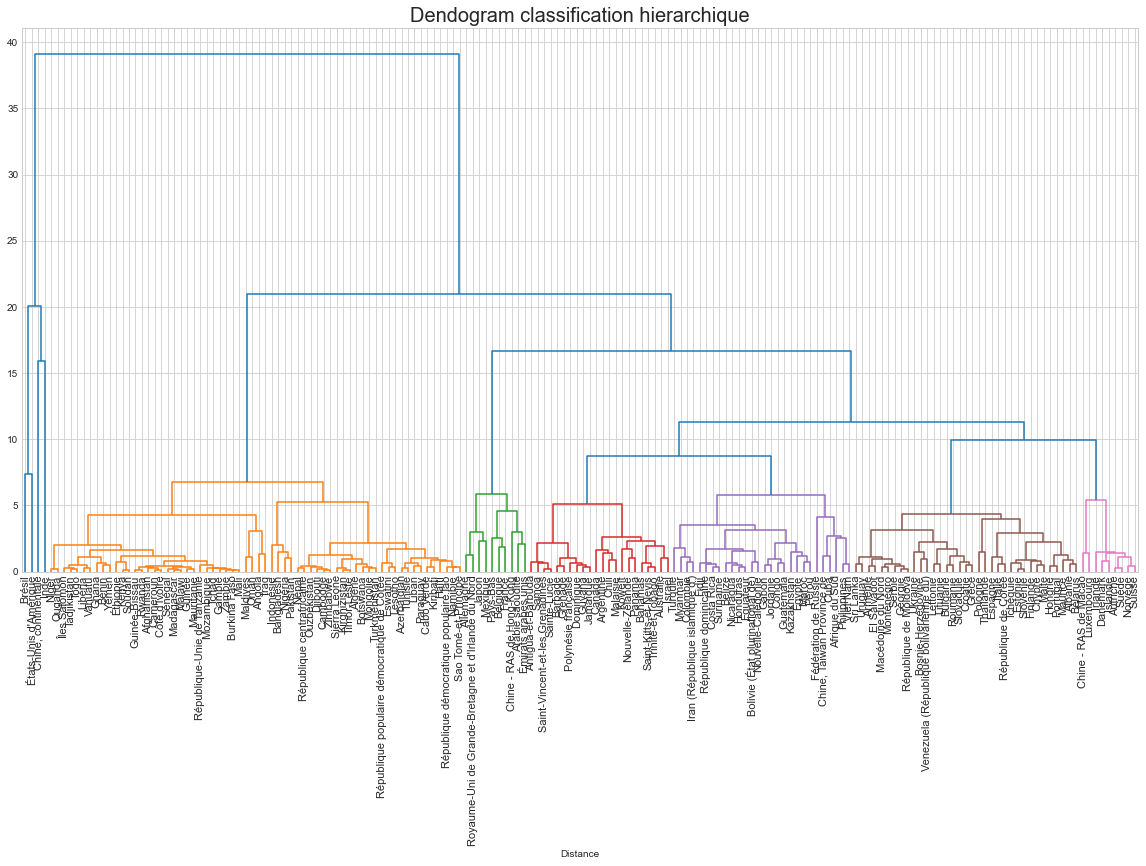

<Figure size 432x288 with 0 Axes>

In [49]:
tab1.set_index('Zone', inplace=True)
X = tab1.values

#Appliquer une opération de centrage-réduction afin d'accorder la même importance aux données
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Importer les librairies pour le dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

#Appliquer la classification hierarchique
Z = linkage(X_scaled, method = 'ward')

#Afficher le dendogram
fig=plt.figure(figsize= (20,10))
plt.title('Dendogram classification hierarchique', fontsize=20)
plt.xlabel('Distance' )
dendrogram(Z,labels=tab1.index,leaf_font_size=11,color_threshold=7,orientation='top')
plt.show()
plt.savefig('Dendogram classification hierarchique n°1.png')

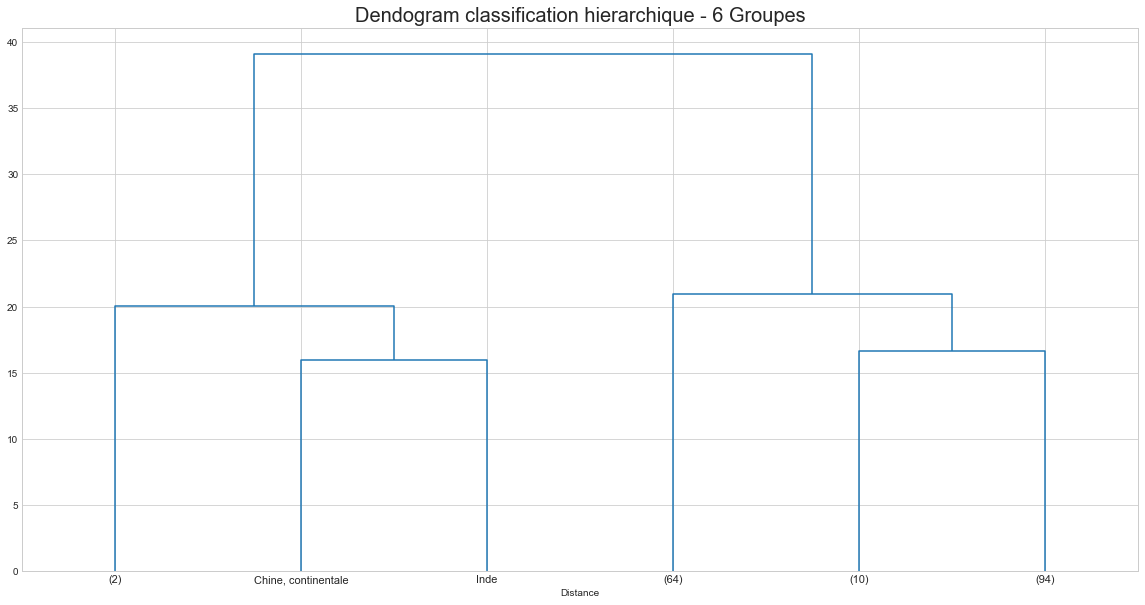

<Figure size 432x288 with 0 Axes>

In [50]:
# Découpage du dendrograme en 6 groupes

#Affichage du dendogram
fig=plt.figure(figsize= (20,10))
plt.title('Dendogram classification hierarchique - 6 Groupes', fontsize=20)
plt.xlabel('Distance' )
dendrogram(Z,labels=tab1.index,p=6, truncate_mode='lastp',leaf_font_size=11,color_threshold=7,orientation='top')
plt.show()

plt.savefig('Dendogram classification hierarchique - 6 Groupes.png')

In [51]:
#Identification des groupes
groupe=fcluster(Z,t=6,criterion='maxclust')

#tri par ordre croissant d'index
ordre=np.argsort(groupe)

#affichage des pays selon les groupes
tab1_groupe=pd.DataFrame(tab1.index[ordre],groupe[ordre]).reset_index()
tab1_groupe=tab1_groupe.rename(columns= {'index':'Groupe'})

In [52]:
tab1_groupe.to_csv('Liste des groupes- Classification.csv')
tab1_groupe

,Groupe,Zone
0,1,États-Unis d'Amérique
1,1,Brésil
2,2,"Chine, continentale"
3,3,Inde
4,4,Afghanistan
...,...,...
167,6,Maurice
168,6,Maroc
169,6,Malte
170,6,Norvège


In [53]:
df = pd.merge(tab1, tab1_groupe, on=['Zone'], how='left', indicator=True)
df.to_csv('df_final.csv')

In [54]:
df

,Zone,Disponibilite alimentaire (Kcal/personne/jour),Production,Disponibilite interieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population,PIB,Groupe,_merge
0,Afghanistan,5.0,28.0,57.0,0.0,29.0,55.0,312.0,35383032.0,36296113.0,2.52,2058.4,4,both
1,Afrique du Sud,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0,56207646.0,57009756.0,1.41,13860.3,6,both
2,Albanie,85.0,13.0,47.0,0.0,38.0,47.0,136.0,2886438.0,2884169.0,-0.08,12771.0,6,both
3,Algérie,22.0,275.0,277.0,0.0,2.0,264.0,748.0,40551392.0,41389189.0,2.02,11737.4,4,both
4,Allemagne,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0,82193768.0,82658409.0,0.56,53071.5,5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,48.0,412.0,94.0,433.0,412.0,588.0,9360980.0,9487203.0,1.33,67183.6,5,both
168,Équateur,83.0,340.0,341.0,0.0,0.0,324.0,759.0,16491116.0,16785361.0,1.75,11617.9,6,both
169,États-Unis d'Amérique,219.0,21914.0,18266.0,3692.0,123.0,18100.0,40344.0,323015995.0,325084756.0,0.64,59914.8,1,both
170,Éthiopie,0.0,14.0,14.0,0.0,1.0,14.0,576.0,103603462.0,106399924.0,2.63,2021.6,4,both


In [55]:
#centroids
centroid=df.groupby('Groupe').mean()
centroid.to_csv('centroid_dendrogram.csv')
centroid

,Disponibilite alimentaire (Kcal/personne/jour),Production,Disponibilite interieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population,PIB
Groupe,,,,,,,,,,,
1,211.500000,18057.500000,14124.000000,3957.500000,63.000000,14041.000000,30547.00000,2.645895e+08,2.664593e+08,0.720000,37219.700000
2,59.000000,18236.000000,18161.000000,576.000000,452.000000,17518.000000,85115.00000,1.414049e+09,1.421022e+09,0.490000,0.000000
3,7.000000,3545.000000,3661.000000,4.000000,0.000000,2965.000000,5060.00000,1.324517e+09,1.338677e+09,1.060000,6182.900000
4,20.343750,101.734375,128.312500,0.703125,28.171875,118.218750,367.71875,2.788654e+07,2.848402e+07,2.202031,5607.656250
5,109.500000,1279.300000,1483.100000,436.600000,717.600000,1437.000000,3777.50000,5.416396e+07,5.448442e+07,0.742000,48504.940000
6,105.723404,474.808511,465.723404,52.542553,60.244681,438.265957,1061.62766,1.802640e+07,1.817386e+07,0.662234,25656.111702


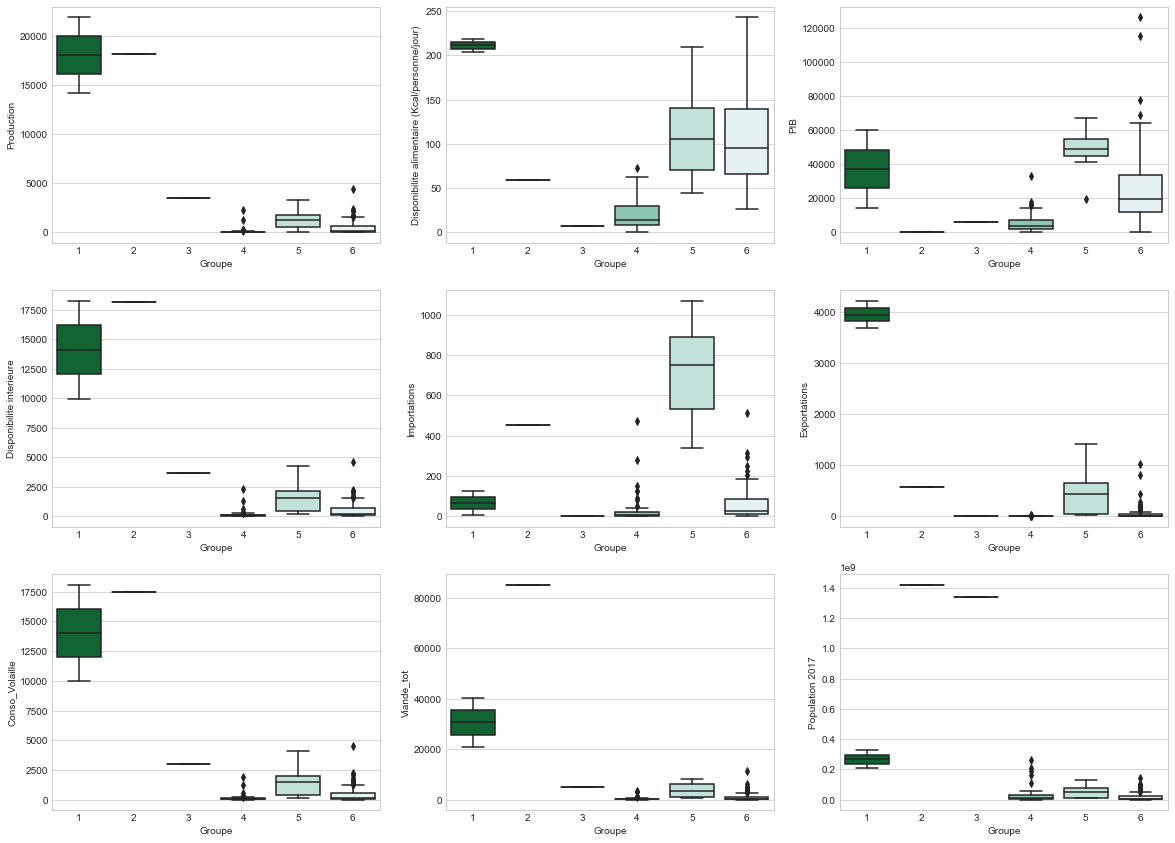

In [56]:
#Caractérisation des groupes en fonction des variables
plt.figure(figsize=(20,20))
plt.subplot(431)
sns.boxplot(x="Groupe", y="Production", data=df, palette='BuGn_r')
plt.subplot(432)
sns.boxplot(x="Groupe", y="Disponibilite alimentaire (Kcal/personne/jour)", data=df, palette='BuGn_r')
plt.subplot(433)
sns.boxplot(x="Groupe", y="PIB", data=df, palette='BuGn_r')
plt.subplot(434)
sns.boxplot(x="Groupe", y="Disponibilite interieure", data=df, palette='BuGn_r')
plt.subplot(435)
sns.boxplot(x="Groupe", y="Importations", data=df, palette='BuGn_r')
plt.subplot(436)
sns.boxplot(x="Groupe", y="Exportations", data=df, palette='BuGn_r')
plt.subplot(437)
sns.boxplot(x="Groupe", y="Conso_Volaille", data=df, palette='BuGn_r')
plt.subplot(438)
sns.boxplot(x="Groupe", y="Viande_tot", data=df, palette='BuGn_r')
plt.subplot(439)
sns.boxplot(x="Groupe", y="Population 2017", data=df, palette='BuGn_r')
plt.savefig('boxplot_production.png')


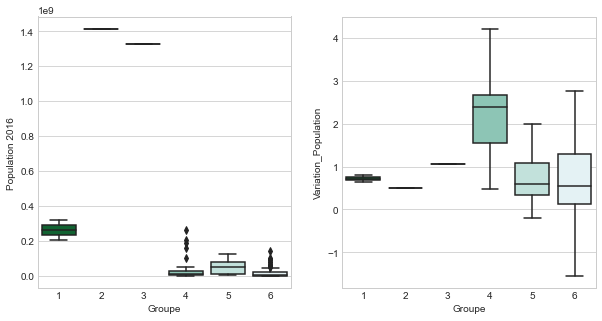

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(x="Groupe", y="Population 2016", data=df, palette='BuGn_r')
plt.subplot(122)
sns.boxplot(x="Groupe", y="Variation_Population", data=df, palette='BuGn_r')

plt.savefig('boxplot_production.png')

## Commentaires et critiques:

In [77]:
 #commentaires

## Liste des Pays à cibler: 

In [58]:
#df.reset_index(inplace=True)
liste_pays= df[(df['Groupe']==5) |(df['Groupe']==2)]['Zone']
liste_pays

4                                              Allemagne
7                                        Arabie saoudite
16                                              Belgique
31                              Chine - RAS de Hong-Kong
34                                   Chine, continentale
51                                                France
75                                                 Japon
98                                               Mexique
117                                             Pays-Bas
124    Royaume-Uni de Grande-Bretagne et d'Irlande du...
167                                  Émirats arabes unis
Name: Zone, dtype: object

In [59]:
liste_pays.to_csv('liste_pays_cible.csv', index=True) 

In [60]:
df.reset_index(inplace=True)

In [61]:
df.drop(columns=["_merge"],inplace=True)

# II - ACP

In [62]:
df.set_index("Zone",inplace=True)
X=df.values
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
df

,index,Disponibilite alimentaire (Kcal/personne/jour),Production,Disponibilite interieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population,PIB,Groupe
Zone,,,,,,,,,,,,,
Afghanistan,0,5.0,28.0,57.0,0.0,29.0,55.0,312.0,35383032.0,36296113.0,2.52,2058.4,4
Afrique du Sud,1,143.0,1667.0,2118.0,63.0,514.0,2035.0,3422.0,56207646.0,57009756.0,1.41,13860.3,6
Albanie,2,85.0,13.0,47.0,0.0,38.0,47.0,136.0,2886438.0,2884169.0,-0.08,12771.0,6
Algérie,3,22.0,275.0,277.0,0.0,2.0,264.0,748.0,40551392.0,41389189.0,2.02,11737.4,4
Allemagne,4,71.0,1514.0,1739.0,646.0,842.0,1609.0,7255.0,82193768.0,82658409.0,0.56,53071.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,167,147.0,48.0,412.0,94.0,433.0,412.0,588.0,9360980.0,9487203.0,1.33,67183.6,5
Équateur,168,83.0,340.0,341.0,0.0,0.0,324.0,759.0,16491116.0,16785361.0,1.75,11617.9,6
États-Unis d'Amérique,169,219.0,21914.0,18266.0,3692.0,123.0,18100.0,40344.0,323015995.0,325084756.0,0.64,59914.8,1


In [63]:
X_scaled

array([[-1.72200985, -1.15172129, -0.27574216, ...,  1.16263116,
        -0.8375884 , -1.01567408],
       [-1.70186938,  1.1332383 ,  0.38855948, ...,  0.15299031,
        -0.26745627,  0.83296023],
       [-1.68172892,  0.17289296, -0.2818218 , ..., -1.20229335,
        -0.32007872,  0.83296023],
       ...,
       [ 1.68172892,  2.39162183,  8.5948532 , ..., -0.54739118,
         1.95736773, -3.78862555],
       [ 1.70186938, -1.23450968, -0.28141649, ...,  1.26268565,
        -0.83936616, -1.01567408],
       [ 1.72200985, -0.93647147, -0.28709082, ...,  1.24449393,
        -0.80835693, -1.01567408]])

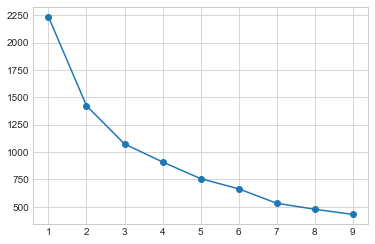

<Figure size 432x288 with 0 Axes>

In [64]:
# Methode des coudes 

import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics

inerties=[]


for k in range(1, 10): # On va calculer l'inertie pour nbre_groupe = 1,2,...10
    km = sklearn.cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    inerties.append(km.inertia_)

plt.plot(range(1, 10), inerties, marker='o')
plt.show()
plt.savefig('Methode des coudes.png')

Le nombre de groupe optimal est de 3 c'est à dire à partir du chiffre ou la décroissance de la courbe semble linéaire

In [65]:
#methode kmean - création de groupes

part=sklearn.cluster.KMeans(n_clusters=3)
part.fit(X_scaled)
clust=part.labels_
clust

array([2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2], dtype=int32)

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [67]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [68]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.73799118e+00 2.45448152e+00 1.26195884e+00 1.04965039e+00
 8.80572865e-01 6.04202995e-01 5.45573854e-01 3.22947964e-01
 1.58726046e-01 5.82790054e-02 1.26501004e-03 3.71259028e-04
 2.45179484e-06]
[4.38817752e-01 1.87708560e-01 9.65093749e-02 8.02729054e-02
 6.73425581e-02 4.62069374e-02 4.17232241e-02 2.46977200e-02
 1.21387093e-02 4.45693646e-03 9.67427175e-05 2.83923497e-05
 1.87503094e-07]


In [78]:
#number of observations 
n = df.shape[0]

#number of variables
p = df.shape[1]

#instantiation
pca = decomposition.PCA(svd_solver='full')

#calculations
coord = pca.fit_transform(X_scaled)

#corrected value
eigval = (n-1)/n*pca.explained_variance_ #or acp.singular_values_**2/n

#square root of eigenvalues
sqrt_eigval = np.sqrt(eigval)

#correlation of variables with axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

#cosine square of variables
cos2var = corvar**2

#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
    
#show
df0=pd.DataFrame({'variable':df.columns,'F1':ctrvar[:,0],'F2':ctrvar[:,1], 'F3':ctrvar[:,2]})

ctrvar


array([[5.82225443e-04, 2.36580212e-02, 9.36900655e-02, 3.94100665e-01,
        4.42384238e-01, 3.05084743e-05, 3.82538572e-02, 5.97599297e-03,
        9.03268709e-04, 4.19489575e-04, 1.29568966e-06, 3.65166831e-07,
        6.62036387e-09],
       [4.14362797e-03, 2.52491196e-01, 6.59689902e-03, 5.36575539e-03,
        5.63590447e-02, 1.83301459e-02, 4.19319377e-01, 1.30313461e-01,
        1.05362995e-01, 1.68629604e-03, 2.82779454e-05, 2.86457333e-06,
        5.88066419e-08],
       [1.62588512e-01, 2.14455504e-03, 3.66344631e-02, 3.27127361e-03,
        7.38399325e-03, 1.00993075e-04, 3.69139927e-05, 1.67303979e-02,
        8.81732293e-03, 6.99803695e-02, 2.98300303e-01, 3.93866624e-01,
        1.44278788e-04],
       [1.67637943e-01, 1.61495074e-03, 8.81400571e-03, 9.20893728e-04,
        8.41753841e-04, 5.51526673e-04, 4.46372974e-03, 5.07270267e-02,
        5.25746033e-04, 1.30573904e-01, 7.75383264e-02, 5.55728169e-01,
        6.20240278e-05],
       [7.84496504e-02, 1.61343089e-

In [70]:
n_components = 13

In [71]:
#pca = PCA(n_components=n_components)

In [72]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

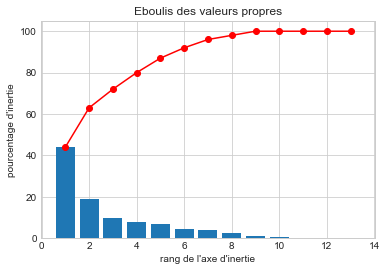

<Figure size 432x288 with 0 Axes>

In [73]:
# Eboulis des valeurs propres 
scree = (pca.explained_variance_ratio_*100).round(2)
scree
scree_cum = scree.cumsum().round()
scree_cum
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
plt.savefig('Eboulis des valeurs propres.png')

In [74]:
# Eboulis des valeurs propres - sous forme de tableau

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(13)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.737991,44.0,44.0
1,Dim2,2.454482,19.0,63.0
2,Dim3,1.261959,10.0,72.0
3,Dim4,1.049650,8.0,80.0
4,Dim5,0.880573,7.0,87.0
5,Dim6,0.604203,5.0,92.0
6,Dim7,0.545574,4.0,96.0
7,Dim8,0.322948,2.0,98.0
8,Dim9,0.158726,1.0,100.0
9,Dim10,0.058279,0.0,100.0


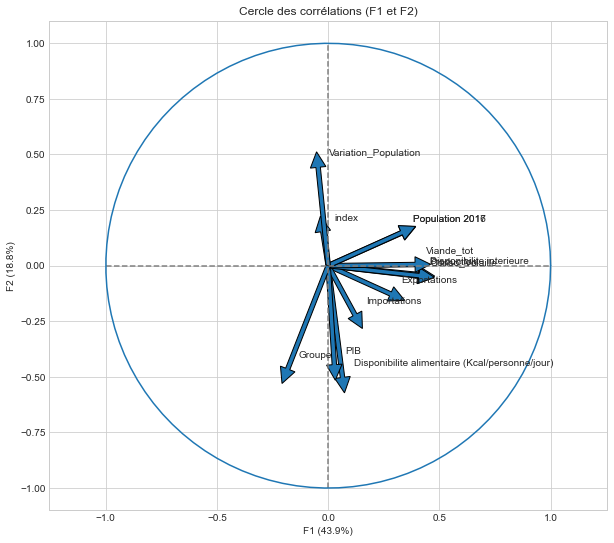

<Figure size 432x288 with 0 Axes>

In [75]:
#Visualisation 
#Cercle des corrélations des variables
features = df.columns
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+2, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)
plt.savefig('Cercle des corrélations des variables.png') 

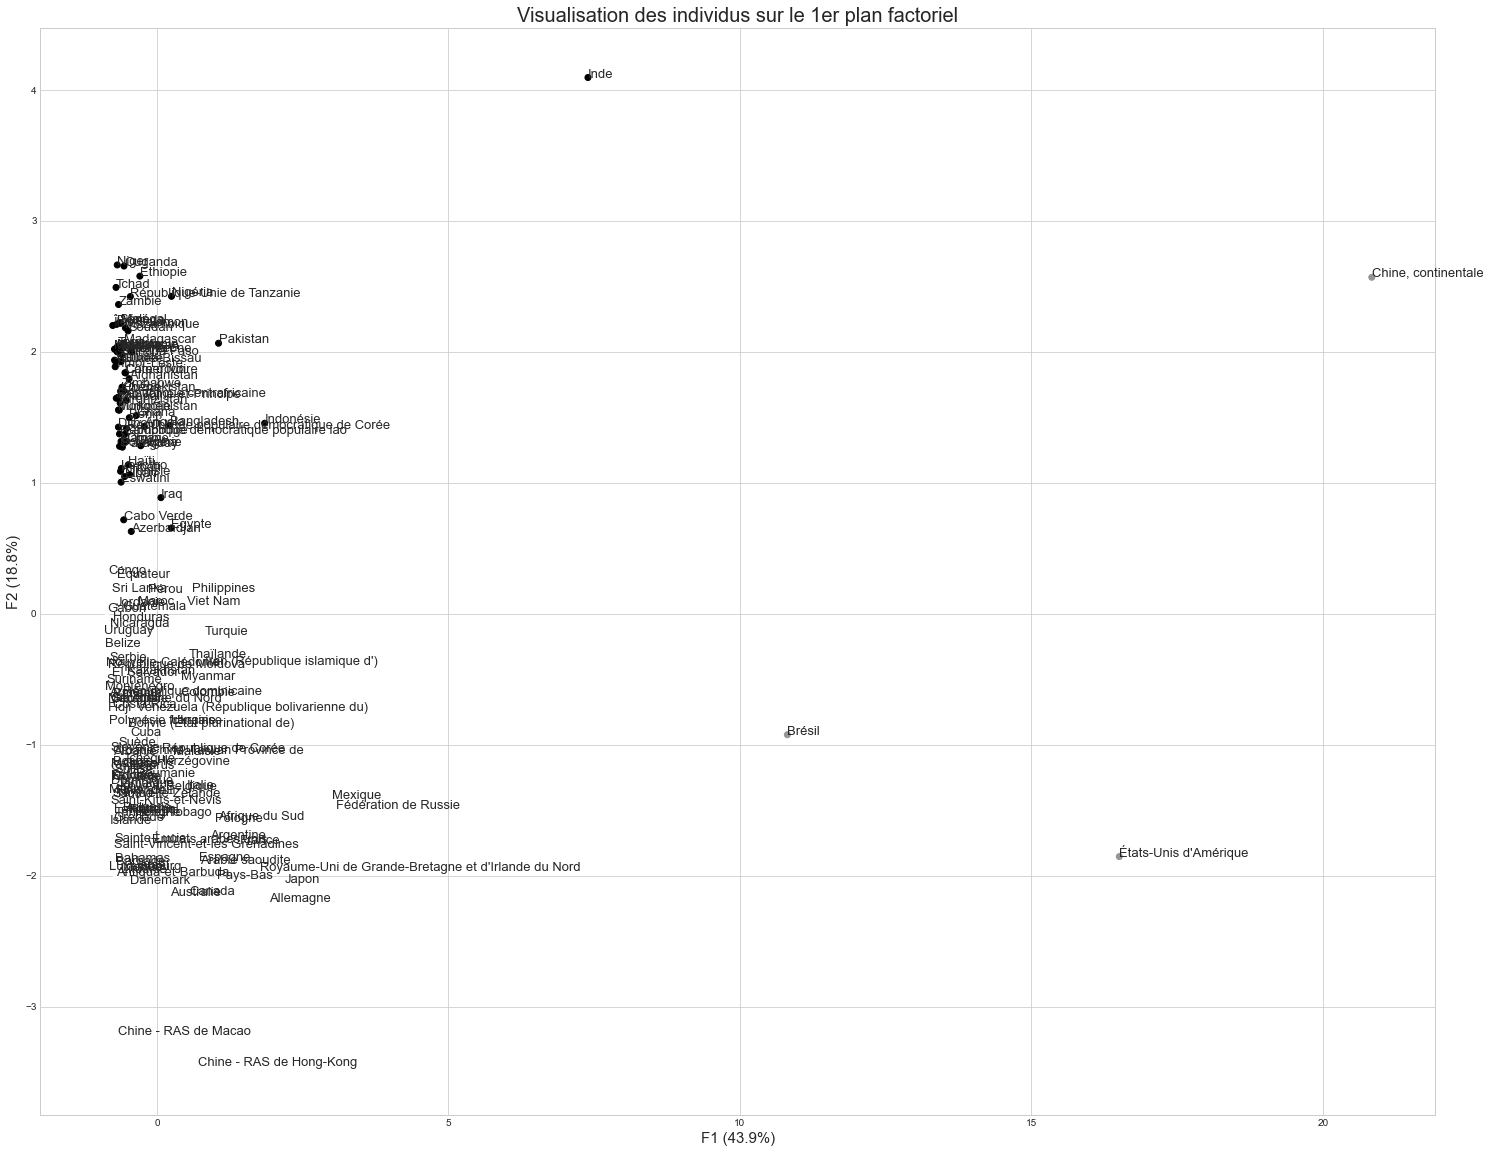

In [80]:
# Visualisation

df.set_index("Zone", inplace=True)
X_proj = pca.transform(X_scaled)
plt.figure(figsize=(25, 20))

plt.scatter(X_proj[:, 0], X_proj[:, 1], c=clust)
for i,(x,y) in enumerate(X_proj[:,[0,1]]):
                    plt.text(x, y, df.index[i], fontsize='13') 

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Visualisation des individus sur le 1er plan factoriel".format(X_proj.shape[0]), fontsize=20)

plt.savefig("Visualisation_ACP_groupe.png")
plt.show()

## Interpretation

In [81]:
#Commentaires les 11 variables sont corrélées à F1 et F2 : 



In [82]:
#afficher les pays des groupes 
df2 = df.copy()
df2["clust"] = clust
df3 = df2.sort_values("clust")

# pays du clust 0
df3.reset_index(inplace=True)
clust_0 = df3[df3['clust']==0]['Zone']
clust_0

0       Géorgie
1      Jordanie
2         Japon
3      Jamaïque
4        Italie
         ...   
98        Chili
99       Canada
100     Pologne
101       Congo
102       Fidji
Name: Zone, Length: 103, dtype: object

In [83]:
clust_1 = df3[df3['clust']==1]['Zone']
clust_1

103    États-Unis d'Amérique
104      Chine, continentale
105                   Brésil
Name: Zone, dtype: object

In [84]:
clust_2 = df3[df3['clust']==2]['Zone']
clust_2

106         République démocratique populaire lao
107    République populaire démocratique de Corée
108                   République-Unie de Tanzanie
109                                   Afghanistan
110                                  Sierra Leone
                          ...                    
167                                         Liban
168                                       Lesotho
169                                      Kiribati
170                                         Kenya
171                                  Îles Salomon
Name: Zone, Length: 66, dtype: object

In [85]:
df3

,Zone,index,Disponibilite alimentaire (Kcal/personne/jour),Production,Disponibilite interieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population,PIB,Groupe,clust
0,Géorgie,62,51.0,22.0,61.0,5.0,51.0,61.0,128.0,4015450.0,4008716.0,-0.17,13589.7,6,0
1,Jordanie,76,98.0,210.0,275.0,10.0,64.0,275.0,372.0,9554286.0,9785843.0,2.37,10003.6,6,0
2,Japon,75,67.0,2215.0,2415.0,10.0,1069.0,2359.0,6289.0,127763265.0,127502725.0,-0.20,41444.2,5,0
3,Jamaïque,74,178.0,128.0,152.0,1.0,31.0,149.0,172.0,2906236.0,2920848.0,0.50,9600.1,6,0
4,Italie,73,65.0,1315.0,1173.0,183.0,97.0,1146.0,4912.0,60663060.0,60673701.0,0.02,41581.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Liban,84,38.0,64.0,73.0,4.0,13.0,73.0,163.0,6714281.0,6819373.0,1.54,15953.7,4,2
168,Lesotho,82,27.0,2.0,17.0,0.0,15.0,17.0,41.0,2075030.0,2091534.0,0.79,2668.3,4,2
169,Kiribati,80,63.0,1.0,2.0,0.0,1.0,2.0,3.0,112524.0,114158.0,1.43,2069.1,4,2
170,Kenya,78,2.0,35.0,35.0,0.0,0.0,34.0,801.0,49051534.0,50221142.0,2.33,4203.6,4,2


In [86]:
#centroids
#df3.drop(columns=['index'], inplace = True)
centroid2=df3.groupby('clust').mean()
centroid2.to_csv('centroid2.csv')
centroid2

,index,Disponibilite alimentaire (Kcal/personne/jour),Production,Disponibilite interieure,Exportations,Importations,Conso_Volaille,Viande_tot,Population 2016,Population 2017,Variation_Population,PIB,Groupe
clust,,,,,,,,,,,,,
0,80.126214,106.631068,546.669903,556.883495,90.330097,123.582524,527.349515,1311.000000,2.079296e+07,2.093927e+07,0.656311,28016.596117,5.902913
1,74.666667,160.666667,18117.000000,15469.666667,2830.333333,192.666667,15200.000000,48736.333333,6.477428e+08,6.513135e+08,0.643333,24813.133333,1.333333
2,94.378788,20.590909,169.303030,198.833333,0.757576,28.984848,178.500000,471.651515,4.854095e+07,4.936510e+07,2.182727,5698.293939,4.015152


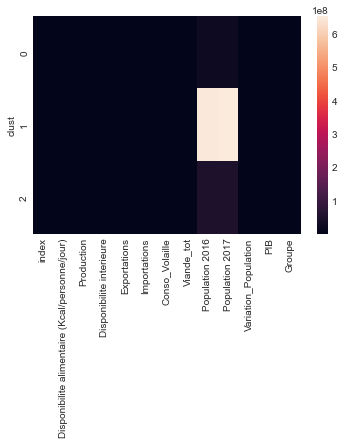

In [88]:
sns.heatmap(centroid2)
plt.savefig('heatmap.png')

ValueError: invalid literal for int() with base 10: 'index'

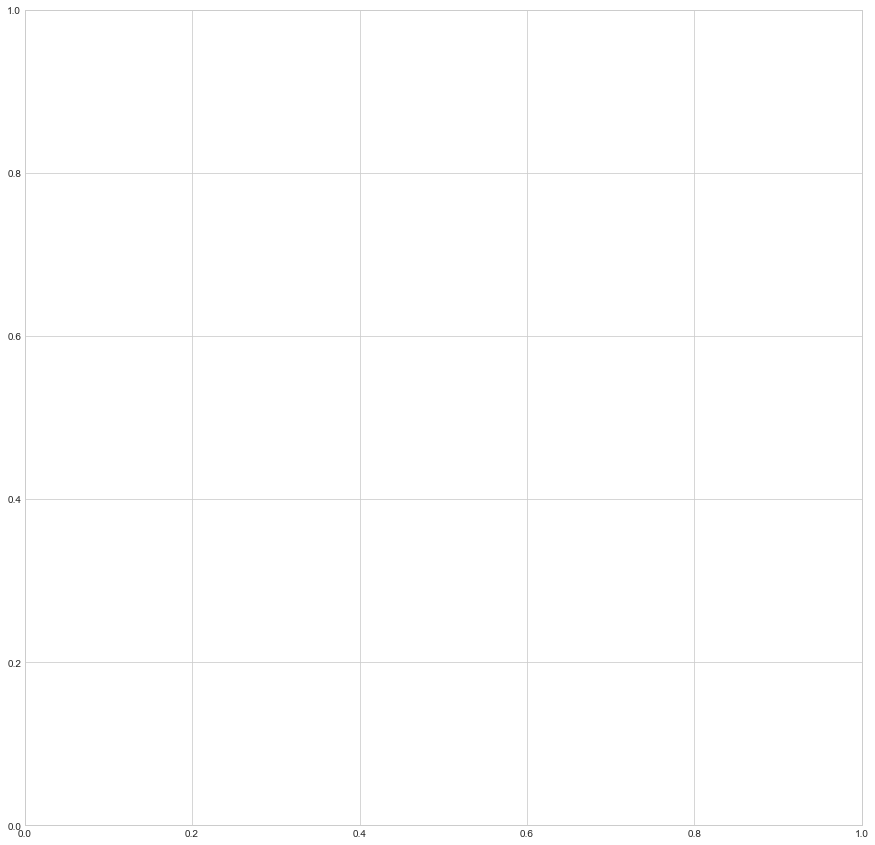

In [90]:

fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    df0.astype(int), ax=ax, annot=True, cbar=False, fmt="d"
)
_ = ax.set(
    title=f"HEATMAP CENTROID CLUSTER",
    xlabel="CLUSTER K-MEAN",
    ylabel="COLUMNS",
)